In [ ]:
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
import numpy as np
from matplotlib.pyplot import figure
import math
import matplotlib.pyplot as plt
import keras
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving XtrainSmall.csv to XtrainSmall.csv


In [ ]:
df = pd.read_csv("XtrainSmall.csv")
df.head()

ID  DATASET  ...  POSITION   VALUE
0  DATA_0000_MODEL_0000_TIME_0000_POS_0000        0  ...         0  0.4539
1  DATA_0000_MODEL_0000_TIME_0000_POS_0001        0  ...         1  0.4126
2  DATA_0000_MODEL_0000_TIME_0000_POS_0002        0  ...         2  0.2572
3  DATA_0000_MODEL_0000_TIME_0000_POS_0003        0  ...         3  0.1897
4  DATA_0000_MODEL_0000_TIME_0000_POS_0004        0  ...         4  0.3569

[5 rows x 6 columns]

In [ ]:
raw_seq = np.array(df['VALUE'])

In [ ]:
raw_seq = raw_seq.tolist()

In [ ]:
# split a univariate sequence
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

In [ ]:
n_steps = 15
# split into samples
X, y = split_sequence(raw_seq, n_steps)
# reshape from [samples, timesteps] into [samples, timesteps, features]
  

In [ ]:
X.shape
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))

In [ ]:
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model

In [ ]:
model.fit(X, y, epochs=15, verbose=1)

Epoch 1/15
44424/44424 [==============================] - 668s 15ms/step - loss: 0.7288
Epoch 2/15
44424/44424 [==============================] - 669s 15ms/step - loss: 0.6258
Epoch 3/15
44424/44424 [==============================] - 681s 15ms/step - loss: 0.5582
Epoch 4/15
44424/44424 [==============================] - 676s 15ms/step - loss: 0.5168
Epoch 5/15
44424/44424 [==============================] - 668s 15ms/step - loss: 0.4823
Epoch 6/15
44424/44424 [==============================] - 648s 15ms/step - loss: 0.4594
Epoch 7/15
44424/44424 [==============================] - 669s 15ms/step - loss: 0.4424
Epoch 8/15
44424/44424 [==============================] - 666s 15ms/step - loss: 0.4284
Epoch 9/15
44424/44424 [==============================] - 666s 15ms/step - loss: 0.4158
Epoch 10/15
44424/44424 [==============================] - 663s 15ms/step - loss: 0.4044
Epoch 11/15
44424/44424 [==============================] - 659s 15ms/step - loss: 0.3939
Epoch 12/15
44424/44424 [=====

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving test_X_r3mO2IZ.csv to test_X_r3mO2IZ.csv


In [ ]:
test = pd.read_csv("test_X_r3mO2IZ.csv")
test.head()

In [ ]:
x_input = np.array(test['VALUE'])
Example = []
for i in range(n_steps):
  Example.append(x_input[i])
Example = np.array(Example)
Example

array([ 0.1024,  0.0171, -0.1838, -0.3251, -0.0652,  0.0371, -0.2792,
       -0.1764, -0.5488, -0.5328, -0.6999, -0.7021, -0.3649, -0.1438,
       -0.403 ])

In [ ]:
x_input = x_input.tolist()

In [ ]:
n_steps = 15
# split into samples
X_test, y_test = split_sequence(x_input, n_steps)

In [ ]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], n_features))

In [ ]:
yhat = model.predict(X_test, verbose=0)
print(yhat)

[[-0.24672616]
 [-0.07263886]
 [ 0.17770725]
 ...
 [-0.37598276]
 [-0.6896595 ]
 [-0.10448379]]


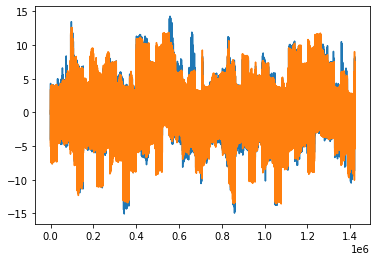

In [ ]:
import matplotlib.pyplot as plt
plt.plot(yhat)
plt.plot(y_test)
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
MSE_scaled = mean_squared_error(y_test, yhat)
print(MSE_scaled)

0.41377053616881543


In [ ]:
def convert_to_csv(array,name):
    df = pd.DataFrame(array)
    return df.to_csv(name, index=False)

In [ ]:
#nota: CAMBIA EL CONTENIDO DE dfObj = pd.DataFrame(X) 
dfObj = pd.DataFrame(y_test) 
from google.colab import files
convert_to_csv(dfObj,'y_test.csv') 
files.download('y_test.csv')

In [ ]:
print("Save the model")

In [ ]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

E: Package 'python-software-properties' has no installation candidate
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
Please enter the verification code: Access token retrieved correctly.


In [ ]:
!mkdir -p drive
!google-drive-ocamlfuse drive

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 15, 50)            10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.save('drive/LSTM_Save_Second_Aproach.h5')